In [6]:
from dataset import load_dataset
from main import train, test
from plotter import plot_error

class Model:
    def __init__(
        self,
        data,
        input_break,
        target_break,
        apply_target
    ):
        (_input, _target) = load_dataset(
            data,
            input_break,
            target_break,
            apply_target
        )
        
        self.input = _input
        self.target = _target
        
    def train(self, S, max_epoch, lr, train_break):
        self.S = S
        self.max_epoch = max_epoch
        self.lr = lr

        errors, W = train(
            self.input[train_break[0]:train_break[1]],
            self.target[train_break[0]:train_break[1]],
            self.S, self.max_epoch, self.lr
        )
        
        self.model = W
        return errors
    
    def test(self, test_break):
        return test(
            self.input[test_break[0]:test_break[1]],
            self.target[test_break[0]:test_break[1]],
            self.S, self.model
        )
    
    def exp(self, S, max_epoch, lr, train_break, test_break):
        errors = self.train(S, max_epoch, lr, train_break)
        pres = self.test(test_break)

        plot_error(errors)
        print(pres)

In [7]:
import pandas as pd
import numpy as np

def apply_target(data_target):
  return np.where(data_target=='M', -1, 1)

model = Model('./dataset/tp1_ej1_training.csv', (1, 11), (0, 1), apply_target)

epoch 0 - error 1/200
epoch 100 - error 119.71774239616818/200
epoch 200 - error 87.89711863281762/200
epoch 300 - error 71.09200130200615/200
epoch 400 - error 62.73644621952331/200
epoch 500 - error 58.700479282103466/200
epoch 600 - error 57.545771212301844/200
epoch 700 - error 57.05438154751788/200
epoch 800 - error 56.78734662613282/200
epoch 900 - error 56.62040955723061/200


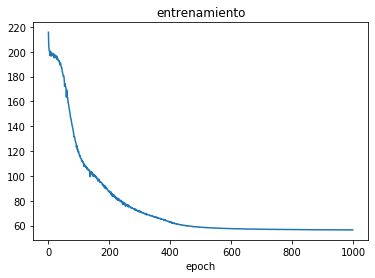

0.82


In [8]:
model.exp(
    [10, 9, 1],
    1000,
    0.01,
    (0, 200),
    (200, 400)
)